# Residual Plots Cheatsheet (Train vs Test)

Quick reference for interpreting residual **count (histogram)** and **density (KDE)** plots across train and test splits. Use these patterns to spot bias, variance problems, overfitting, underfitting, and heavy tails.

## What to Look For
- **Centered at 0**: Low bias.
- **Symmetric shape**: No systematic under/over prediction.
- **Similar spread Train vs Test**: Good generalization.
- **Wide spread / heavy tails**: High variance or noisy data.
- **Shifted mean**: Bias (systematic over/under prediction).
- **Train narrow, Test wide**: Overfitting (variance problem).
- **Both wide with bias**: Underfitting or mis-specified model.

## Scenarios Covered
1. **Well-behaved**: Zero-mean, symmetric, similar spread.
2. **Biased (positive shift)**: Residuals shifted above zero (model under-predicts).
3. **Biased (negative shift)**: Residuals below zero (model over-predicts).
4. **Overfitting**: Train residuals tight, Test residuals wide.
5. **Underfitting**: Both Train/Test wide and biased.
6. **Heavy tails**: Extreme residuals more common than normal.

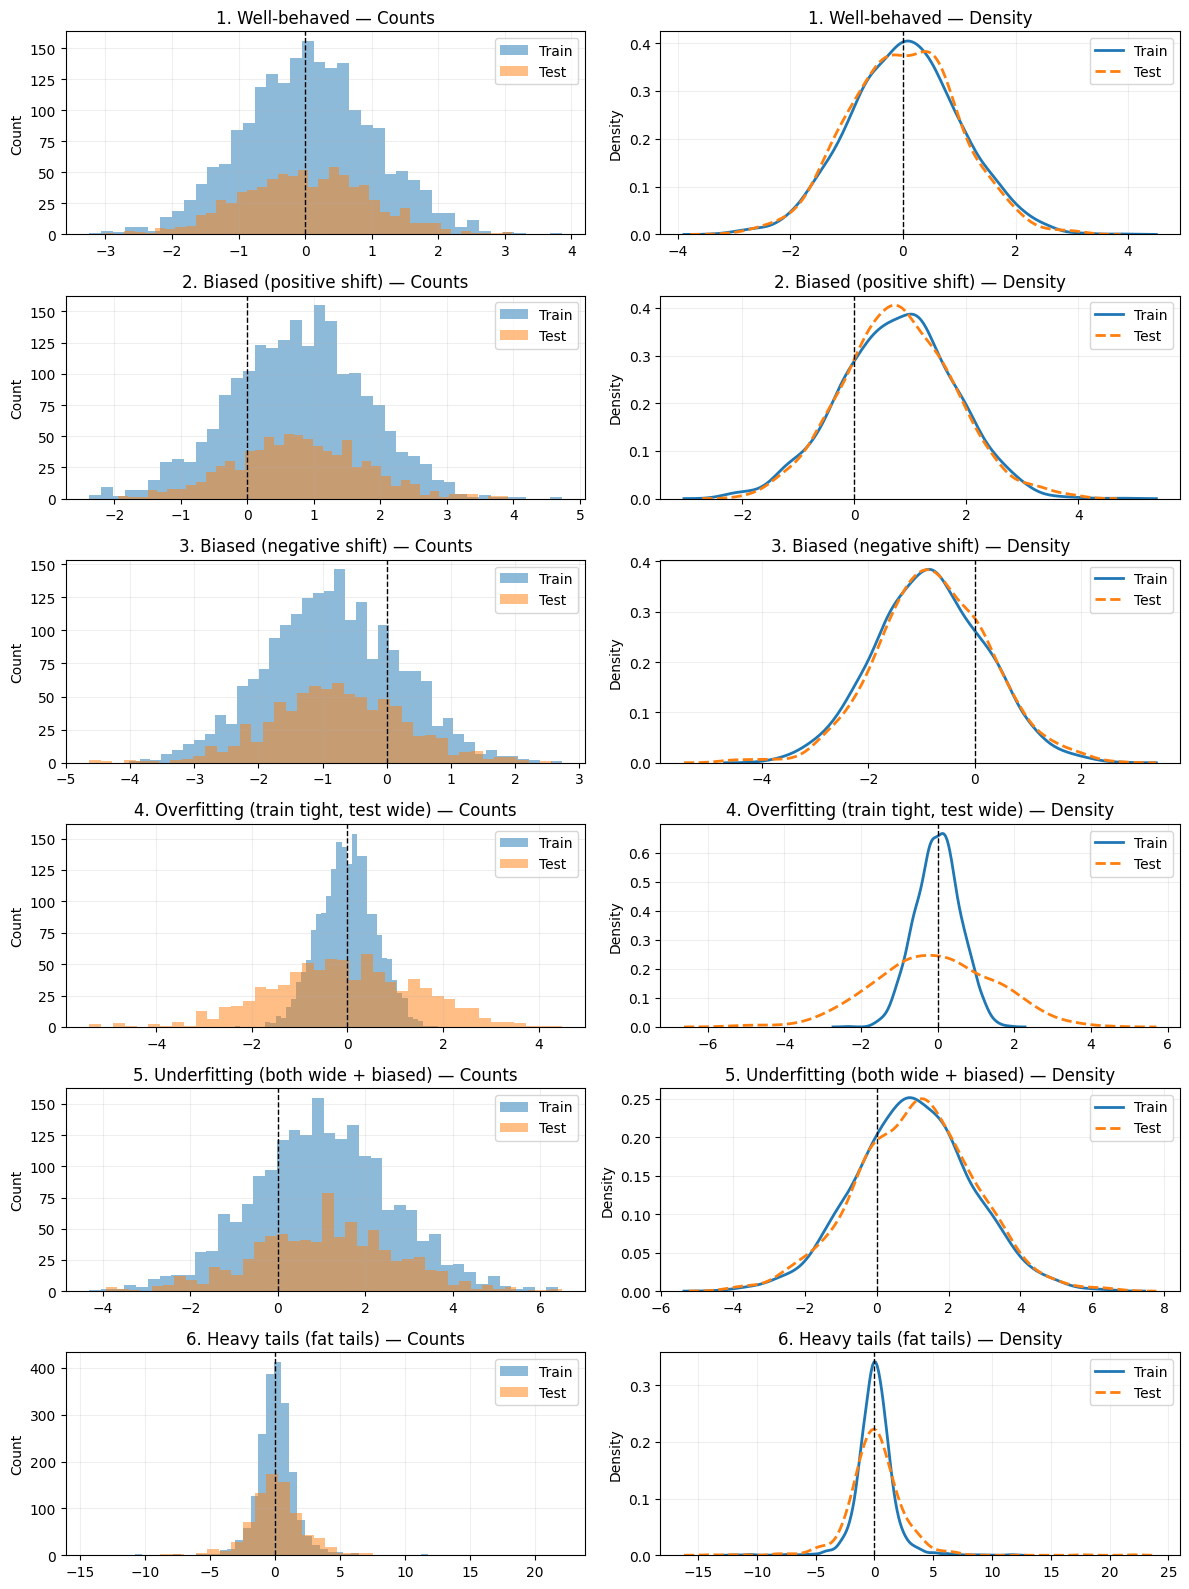

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n_train = 2000
n_test = 800


def make_residuals(mean=0.0, scale_train=1.0, scale_test=1.0, heavy_tail=False):
    if heavy_tail:
        # Student-t with df=3 for fat tails
        train = np.random.standard_t(df=3, size=n_train) * scale_train + mean
        test = np.random.standard_t(df=3, size=n_test) * scale_test + mean
    else:
        train = np.random.normal(loc=mean, scale=scale_train, size=n_train)
        test = np.random.normal(loc=mean, scale=scale_test, size=n_test)
    return train, test

scenarios = [
    ("Well-behaved", dict(mean=0.0, scale_train=1.0, scale_test=1.0, heavy_tail=False)),
    ("Biased (positive shift)", dict(mean=0.8, scale_train=1.0, scale_test=1.0, heavy_tail=False)),
    ("Biased (negative shift)", dict(mean=-0.8, scale_train=1.0, scale_test=1.0, heavy_tail=False)),
    ("Overfitting (train tight, test wide)", dict(mean=0.0, scale_train=0.6, scale_test=1.6, heavy_tail=False)),
    ("Underfitting (both wide + biased)", dict(mean=1.0, scale_train=1.6, scale_test=1.6, heavy_tail=False)),
    ("Heavy tails (fat tails)", dict(mean=0.0, scale_train=1.0, scale_test=1.4, heavy_tail=True)),
]

fig, axes = plt.subplots(len(scenarios), 2, figsize=(12, 16))

for row, (title, cfg) in enumerate(scenarios):
    r_train, r_test = make_residuals(**cfg)

    # Histogram (counts)
    ax_h = axes[row, 0]
    bins = 40
    ax_h.hist(r_train, bins=bins, alpha=0.5, color='#1f77b4', label='Train', density=False)
    ax_h.hist(r_test, bins=bins, alpha=0.5, color='#ff7f0e', label='Test', density=False)
    ax_h.axvline(0, color='k', linestyle='--', linewidth=1)
    ax_h.set_title(f"{row+1}. {title} — Counts")
    ax_h.set_ylabel('Count')
    ax_h.legend()
    ax_h.grid(alpha=0.2)

    # Density (KDE)
    ax_d = axes[row, 1]
    sns.kdeplot(r_train, ax=ax_d, color='#1f77b4', label='Train', linewidth=2)
    sns.kdeplot(r_test, ax=ax_d, color='#ff7f0e', label='Test', linewidth=2, linestyle='--')
    ax_d.axvline(0, color='k', linestyle='--', linewidth=1)
    ax_d.set_title(f"{row+1}. {title} — Density")
    ax_d.set_ylabel('Density')
    ax_d.legend()
    ax_d.grid(alpha=0.2)

plt.tight_layout()
plt.show()


## How to Diagnose from the Plots
- **Bias**: Train and test curves centered away from 0.
- **Overfitting**: Train narrow/tall; Test wide/flat.
- **Underfitting**: Both wide and biased; residuals not centered.
- **Heavy tails**: Thick tails in density; many extreme bars in histogram.
- **Good fit**: Train/Test centered at 0, symmetric, similar spread.

Tip: Also inspect residuals vs fitted values for heteroscedasticity and structure.